In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import statsmodels.api as sm
import pandas as pd
from scipy import optimize
from autograd import grad

In [97]:
tau = 10.
eta_0 = 0.1
tau_adapt = 10.
rho_0 = 0.5
v = 0
delta_u = 1.
mu_M = 0.00001
mu_Q = 0.00001
tau_G = 10.
tau_baseline = 100.
dt = 1.

In [98]:
num_visible = 9
num_hidden = 9
num_neurons = num_visible + num_hidden
num_timebins = 5000

weights_M = np.random.normal(loc = 0, scale = 0.1, size = (num_neurons, num_neurons))
np.fill_diagonal(weights_M, 0)

weights_Q = np.random.normal(loc = 0, scale = 0.1, size = (num_neurons, num_neurons))
np.fill_diagonal(weights_Q, 0)

# no connections from visible->visible or hidden->visible in Q weights (top half of matrix)
weights_Q[:num_visible, :] = 0

phi = np.zeros(shape = (num_neurons, num_timebins))
rho = np.zeros(shape = (num_neurons, num_timebins))
eta = np.zeros(shape = (num_neurons, num_timebins))
u = np.zeros(shape = (num_neurons, num_timebins))
spikes = np.zeros(shape = (num_neurons, num_timebins))
spike_probs = np.zeros(shape = (num_neurons, num_timebins))

# phi[:, 0] = np.random.normal(loc = 0.0, scale = 0.1, size = num_neurons)
phi[:, 0] = np.zeros(num_neurons)
# eta[:, 0] = np.random.normal(loc = 0.0, scale = 0.1, size = num_neurons)
eta[:, 0] = np.zeros(num_neurons)
u[:, 0] = np.matmul(weights_M, phi[:, 0]) - eta[:, 0]
rho[:, 0] = rho_0 * np.exp(u[:, 0])
spike_probs[:, 0] = 1-np.exp(-rho[:, 0])
spikes[:, 0] = np.random.binomial(n = 1, p = spike_probs[:, 0])



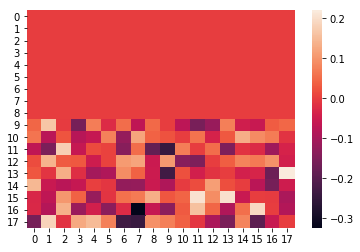

In [99]:
sns.heatmap(weights_Q)

In [100]:

for tt in range(1, num_timebins):
        
#     for ii in range(num_neurons):
        
    dphi = dt * (1 / tau) * (spikes[:, tt - 1] - phi[:, tt - 1])
    deta = dt * (1 / tau_adapt) * (spikes[:, tt - 1] - eta[:, tt - 1])

    phi[:, tt] = phi[:, tt - 1] + dphi
    eta[:, tt] = eta[:, tt - 1] + deta
    
#     if tt % 100 < 5:
#         phi[:, tt] += 0.5

    total_potential = np.matmul(weights_M, phi[:, tt]) - eta_0 * eta[:, tt]
    u[:, tt] = total_potential

    rho[:, tt] = rho_0 * np.exp((u[:, tt] - v) / delta_u)

#         spikes[:, tt] = np.random.poisson(rho[:, tt])
    spike_probs[:, tt] = 1-np.exp(-dt*rho[:, tt])
    spikes[:, tt] = np.random.binomial(n = 1, p = spike_probs[:, tt])

In [101]:
gaussian_intervals = np.random.normal(size = 100, loc=100, scale=10).astype(int)

In [102]:
# ## staircase pattern
# neuron_block_size = np.floor(num_visible / 3)
# curr_neuron_block = 0
# interval_idx = 0
# timebin_counter = 0

# spikes[int(curr_neuron_block * neuron_block_size):int((curr_neuron_block + 1) * neuron_block_size), 0] = 1

    
# for tt in range(1, num_timebins):
                
#     dphi = dt * (1 / tau) * (spikes[:, tt - 1] - phi[:, tt - 1])
#     deta = dt * (1 / tau_adapt) * (spikes[:, tt - 1] - eta[:, tt - 1])

#     phi[:, tt] = phi[:, tt - 1] + dphi
#     eta[:, tt] = eta[:, tt - 1] + deta

#     total_potential = np.matmul(weights_M, phi[:, tt]) - eta_0 * eta[:, tt]
#     u[:, tt] = total_potential

#     rho[:, tt] = rho_0 * np.exp((u[:, tt] - v) / delta_u)
    
#     rho[int(curr_neuron_block * neuron_block_size):int((curr_neuron_block + 1) * neuron_block_size), tt] += 1.0
    
#     rho[int(curr_neuron_block * neuron_block_size):int((curr_neuron_block + 1) * neuron_block_size), tt] += 10.0
#     nonblock_idx = np.delete(np.arange(num_visible), np.arange(int(curr_neuron_block * neuron_block_size), int((curr_neuron_block + 1) * neuron_block_size)))
#     rho[nonblock_idx, tt] = 0.05


# #         spikes[:, tt] = np.random.poisson(rho[:, tt])
#     spike_probs[:, tt] = 1-np.exp(-dt*rho[:, tt])
#     spikes[:, tt] = np.random.binomial(n = 1, p = spike_probs[:, tt])
        
#     timebin_counter += 1
#     if timebin_counter == gaussian_intervals[interval_idx]:
#         interval_idx += 1
#         timebin_counter = 0
#         if curr_neuron_block < 2:
#             curr_neuron_block += 1
#         else:
#             curr_neuron_block = 0

Text(159,0.5,'neuron index')

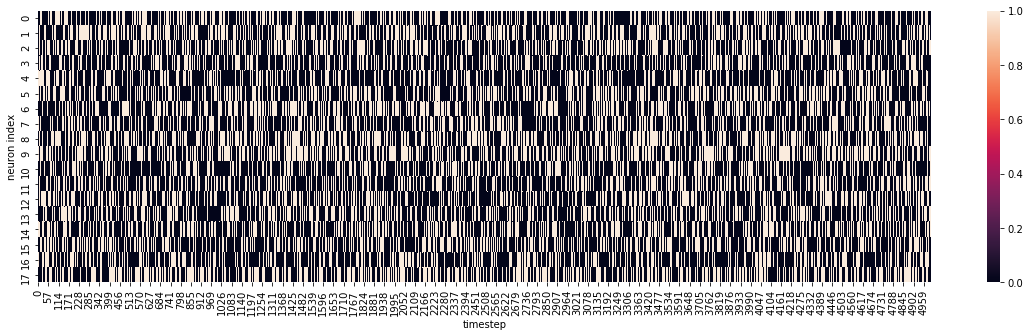

In [103]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(spikes)
plt.xlabel("timestep")
plt.ylabel("neuron index")

In [104]:
import autograd.numpy as np

In [105]:
learned_weights_M = np.random.normal(loc = 0, scale = 0.1, size = (num_neurons, num_neurons))
np.fill_diagonal(learned_weights_M, 0)

learned_weights_Q = np.random.normal(loc = 0, scale = 0.1, size = (num_neurons, num_neurons))
np.fill_diagonal(learned_weights_Q, 0)

free_energy_trace = []
LL_M_trace = []
LL_Q_trace = []
iter_num = 0

In [106]:



for iter_num in range(300):
    
    phi_Q = phi #np.zeros(shape = (num_neurons, num_timebins))
    rho_Q = rho #np.zeros(shape = (num_neurons, num_timebins))
    eta_Q = eta #np.zeros(shape = (num_neurons, num_timebins))
    u_Q = u #np.zeros(shape = (num_neurons, num_timebins))
    spikes_Q = np.zeros(shape = (num_neurons, num_timebins))
    spike_probs_Q = np.zeros(shape = (num_neurons, num_timebins))

#     phi_Q = phi
#     eta_Q[:, 0] = np.zeros(num_neurons)
#     u_Q[:, 0] = np.matmul(weights_Q, phi_Q[:, 0]) - eta_Q[:, 0]
#     rho_Q[:, 0] = rho_0 * np.exp(u_Q[:, 0])
    spike_probs_Q[:, 0] = 1-np.exp(-rho_Q[:, 0])
    spikes_Q[:, 0] = np.random.binomial(n = 1, p = spike_probs_Q[:, 0])
    spikes_Q[:num_visible, :] = spikes[:num_visible, :]
    
    
    ## Simulate t = 1,...,T for Q network to get hidden neurons' spikes
    for tt in range(1, num_timebins):

        dphi = dt * (1 / tau) * (spikes_Q[:, tt - 1] - phi_Q[:, tt - 1])
        deta = dt * (1 / tau_adapt) * (spikes_Q[:, tt - 1] - eta_Q[:, tt - 1])

        phi_Q[:, tt] = phi_Q[:, tt - 1] + dphi
        eta_Q[:, tt] = eta_Q[:, tt - 1] + deta

        total_potential = np.matmul(learned_weights_Q, phi_Q[:, tt]) - eta_0 * eta_Q[:, tt]
        u_Q[:, tt] = total_potential

        rho_Q[:, tt] = rho_0 * np.exp((u_Q[:, tt] - v) / delta_u)

        spike_probs_Q[:, tt] = 1-np.exp(-dt*rho_Q[:, tt])
        spikes_Q[:, tt] = np.random.binomial(n = 1, p = spike_probs_Q[:, tt])
        spikes_Q[:num_visible, :] = spikes[:num_visible, :]



    ## Set hidden spikes to be those just simulated from Q network
    spikes[num_visible:, :] = spikes_Q[num_visible:, :]


    ## Calculate likelihood of M network

    def LL_M(curr_weights):
        # make sure weights are shaped correctly
        curr_weights = np.reshape(curr_weights, [num_neurons, num_neurons])
        
        total_potential = np.matmul(curr_weights, phi) - eta_0 * eta

        curr_rho = rho_0 * np.exp((total_potential - v) / delta_u)
        LL = np.sum(np.multiply(np.log(rho), spikes) - curr_rho) * dt
        return -LL



    ## Take gradient of M network LL wrt M weights and update M weights

    curr_LL_M = LL_M(learned_weights_M)
    grad_LL_M = grad(LL_M)
    M_weights_gradients = grad_LL_M(learned_weights_M)

    learned_weights_M -= mu_M * M_weights_gradients


    ## Calculate likelihood of Q network (only sums over hidden neurons)

    def LL_Q(curr_weights):
        # make sure weights are shaped correctly
        curr_weights = np.reshape(curr_weights, [num_neurons, num_neurons])
        
        total_potential = np.matmul(curr_weights, phi_Q) - eta_0 * eta_Q

        curr_rho = rho_0 * np.exp((total_potential - v) / delta_u)
        individual_likelihoods = np.multiply(np.log(curr_rho), spikes_Q) - curr_rho
        LL = np.sum(individual_likelihoods[num_visible:, :]) * dt # only sum over hidden
        return -LL



    ## Calculate point estimate of free energy

    curr_LL_Q = LL_Q(learned_weights_Q)
    free_energy = curr_LL_Q - curr_LL_M
    free_energy_trace.append(free_energy)


    ## Take gradient wrt Q network LL, multiply by free energy, and update Q weights
    ## Set connections toward visible neurons to 0

    grad_LL_Q = grad(LL_Q)
    Q_weights_gradients = grad_LL_Q(learned_weights_Q)

    if iter_num == 0:
        curr_free_energy = 1
    else:
        curr_free_energy = free_energy - np.mean(free_energy_trace)
    
#     mu_Q = 1e-10
    learned_weights_Q -= mu_Q * Q_weights_gradients
    learned_weights_Q[:num_visible, :] = 0

    LL_M_trace.append(curr_LL_M)
    LL_Q_trace.append(curr_LL_Q)

    if iter_num % 20 == 0:
        print 'iter: {}, M: {}, Q: {}'.format(iter_num, curr_LL_M, curr_LL_Q)


iter: 0, M: 68398.7275844, Q: 34615.375481
iter: 20, M: 46058.9569626, Q: 31592.3144443
iter: 40, M: 40590.0612571, Q: 29861.595615
iter: 60, M: 37832.899477, Q: 28559.1042842
iter: 80, M: 36073.0915392, Q: 27492.7209365
iter: 100, M: 34686.5819769, Q: 26462.031902
iter: 120, M: 33790.0921823, Q: 25773.2811001
iter: 140, M: 32954.4334601, Q: 25029.3395898
iter: 160, M: 32464.617822, Q: 24609.1315625
iter: 180, M: 31936.1349221, Q: 24107.3676233
iter: 200, M: 31373.9053873, Q: 23527.0113628
iter: 220, M: 30998.6224226, Q: 23176.1981025
iter: 240, M: 30545.0138835, Q: 22688.3090926
iter: 260, M: 30188.1660313, Q: 22307.2905379
iter: 280, M: 29748.5320643, Q: 21830.5553797


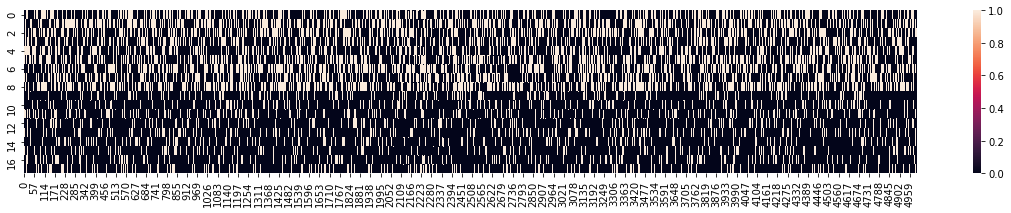

In [107]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.heatmap(spikes_Q)

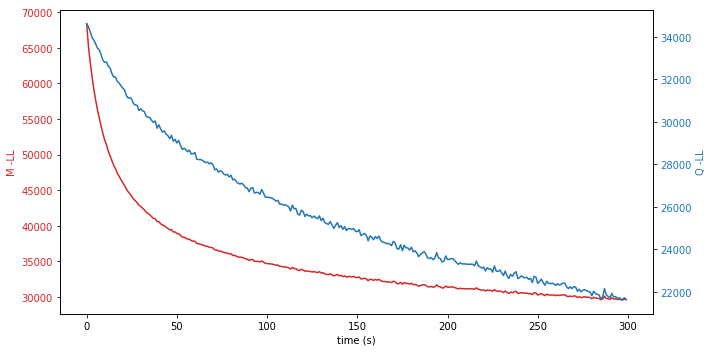

In [108]:
fig, ax1 = plt.subplots(figsize = (10, 5))

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('M -LL', color=color)
ax1.plot(LL_M_trace, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Q -LL', color=color)  # we already handled the x-label with ax1
ax2.plot(LL_Q_trace, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [109]:
print np.sum((learned_weights_M[:num_visible, :num_visible] - weights_M[:num_visible, :num_visible])**2)

26.65621312951266


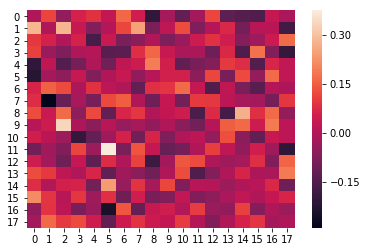

In [110]:
sns.heatmap(weights_M)

In [111]:
curr_neuron_block = 0
spikes[int(curr_neuron_block * neuron_block_size):int((curr_neuron_block + 1) * neuron_block_size), 0] = 1

for tt in range(1, num_timebins):
        
        
    dphi = dt * (1 / tau) * (spikes[:, tt - 1] - phi[:, tt - 1])
    deta = dt * (1 / tau_adapt) * (spikes[:, tt - 1] - eta[:, tt - 1])

    phi[:, tt] = phi[:, tt - 1] + dphi
    eta[:, tt] = eta[:, tt - 1] + deta

    total_potential = np.matmul(weights_M, phi[:, tt]) - eta_0 * eta[:, tt]
    u[:, tt] = total_potential

    rho[:, tt] = rho_0 * np.exp((u[:, tt] - v) / delta_u)

#         spikes[:, tt] = np.random.poisson(rho[:, tt])
    spike_probs[:, tt] = 1-np.exp(-dt*rho[:, tt])
    spikes[:, tt] = np.random.binomial(n = 1, p = spike_probs[:, tt])

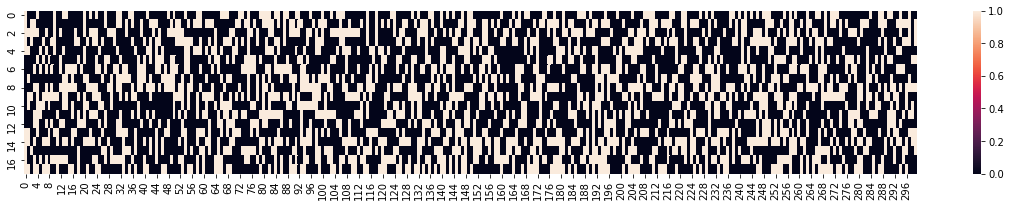

In [112]:
fig, ax = plt.subplots(figsize=(20, 3))
sns.heatmap(spikes[:, :300])